<a href="https://colab.research.google.com/github/chiragkumargohil/co2-emissions-data-analysis/blob/main/co2_emissions_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from co2_emission_analysis import CO2EmissionAnalysis


   Welcome to the CO2 Emission Data Analysis (1997-2010, 195 countries). There are four questions that print data, provide a summary of given year, visualize data for given countries (in Matplotlib), and save data in separate file for given countries.

--------------------------------------------------

Do you want to view the data? (y/n): n

--------------------------------------------------

Enter a year to view its summary (1997 to 2010): 1997

=> In 1997, countries with minimum and maximum CO2 emission levels were, Chad and Qatar respectively. The average CO2 emissions in 1997 were 4.96.

--------------------------------------------------

Enter the 'comma-separated' countries for which you want to visualize data: india, pakistan


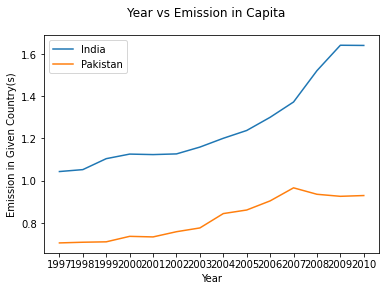


--------------------------------------------------

Enter the 'comma-separated' coutries for which you want to extract data: india, pakistan
Data added in file named, 'Emissions_subset.csv'

--------------------------------------------------

<"Thank You. Enjoy your day. :)/>"



In [3]:
if __name__ == '__main__':
    print('\n   Welcome to the CO2 Emission Data Analysis (1997-2010, 195 countries). There are four questions that print data, provide a summary of given year, visualize data for given countries (in Matplotlib), and save data in separate file for given countries.')
    print('\n--------------------------------------------------\n')

    co2 = CO2EmissionAnalysis()

    while True:
        q1 = input('Do you want to view the data? (y/n): ').lower()
        if q1 == 'y':
            co2.show_data()
            break
        elif q1 == 'n':
            break
        else:
            print('Invalid response.\n')
            continue
    print('\n--------------------------------------------------\n')
    
    while True:
        q2 = input('Enter a year to view its summary (1997 to 2010): ')
        if not co2.valid_year(q2):
            continue
        else:
            break
    
    co2.summary_of_year(q2)
    print('\n--------------------------------------------------\n')

    while True:
        q3 = input("Enter the 'comma-separated' countries for which you want to visualize data: ").title()
        countries = [i.strip() for i in q3.split(',')]
        if not co2.is_available(countries):
            continue
        else:
            break
    
    co2.visualize_stats_of(countries)
    print('\n--------------------------------------------------\n')

    while True:
        q4 = input("Enter the 'comma-separated' coutries for which you want to extract data: ").title()
        nations = [i.strip() for i in q4.split(',')]
        
        if not co2.is_available(nations):
            continue
        else:
            break
    
    co2.extract_data(nations)
    print('\n--------------------------------------------------')
    print('\n<"Thank You. Enjoy your day. :)/>"\n')